## Почему мы должны использовать NumPy и SciPy?

**Эффективная работа с массивами и матрицами:**

NumPy и SciPy предоставляют высокопроизводительные структуры данных для хранения и манипулирования массивами и матрицами, что существенно ускоряет вычисления.

**Возможности для научных вычислений:**

Эти библиотеки содержат широкий набор функций и методов для решения разнообразных задач, таких как оптимизация, аппроксимация данных, решение дифференциальных уравнений, интегрирование и многое другое.

**Удобство и простота в использовании:**

Обе библиотеки предлагают простой и интуитивно понятный синтаксис, что облегчает разработку и улучшает читаемость кода.

## NumPy

Простое напоминание из лекции:

    Создание массивов:
        np.array(iterable): Создает одномерный массив из итерируемого объекта.
        np.zeros(shape): Создает массив из нулей заданной формы.
        np.ones(shape): Создает массив из единиц заданной формы.
        np.empty(shape): Создает массив без инициализации заданной формы.

    Арифметические операции:
        np.add(x, y): Сложение элементов массивов x и y.
        np.subtract(x, y): Вычитание элементов массива y из массива x.
        np.multiply(x, y): Поэлементное умножение массивов x и y.
        np.divide(x, y): Поэлементное деление массива x на массив y.

    Агрегирование данных:
        np.sum(arr): Сумма всех элементов массива arr.
        np.mean(arr): Среднее значение элементов массива arr.
        np.max(arr): Максимальное значение в массиве arr.
        np.min(arr): Минимальное значение в массиве arr.
        np.argmax(arr): Индекс максимального значения в массиве arr.
        np.argmin(arr): Индекс минимального значения в массиве arr.

    Изменение формы массива:
        arr.reshape(new_shape): Изменяет форму массива на заданную.
        arr.flatten(): Преобразует многомерный массив в одномерный.

    Индексация и нарезка:
        arr[index]: Возвращает элемент по индексу.
        arr[start:stop:step]: Выполняет нарезку массива.

    Матричные операции:
        np.dot(a, b): Умножение матриц a и b.
        np.transpose(arr): Транспонирование массива.

    Случайные числа:
        np.random.rand(shape): Генерирует случайные числа с равномерным распределением в заданной форме.

    Фильтрация и маскирование:
        arr > value: Возвращает булев массив, указывающий, какие элементы больше value.
        np.where(condition, x, y): Возвращает элементы из x, если условие condition истинно, и из y в противном случае.

    Сортировка:
        np.sort(arr): Возвращает отсортированный массив.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Задание №1

Замените столбец 0 и столбец 1 местами

In [2]:
array = np.arange(9).reshape(3, 3)
print(f"Оригинальный \n{array}")
# Your code:
array = array[:, [1, 0, 2]]

print(f"Решение \n{array}")

Оригинальный 
[[0 1 2]
 [3 4 5]
 [6 7 8]]
Решение 
[[1 0 2]
 [4 3 5]
 [7 6 8]]


### Задание №2

Замените строку 0 и строку 1 местами

In [3]:
array = np.arange(9).reshape(3, 3)
print(f"Оригинальный \n{array}")
# Your code:
array = array[[1, 0, 2], :]

print(f"Решение \n{array}")

Оригинальный 
[[0 1 2]
 [3 4 5]
 [6 7 8]]
Решение 
[[3 4 5]
 [0 1 2]
 [6 7 8]]


### Задание №3

Перепишите цикл перемножения матриц с использованием numpy

In [4]:
array1 = [*range(1, 10000001)]
array2 = [*range(10, 100000010, 10)]

# Выполняем умножение элементов массивов
def multiply_vectors(array_1, array_2):
    assert len(array_1) == len(array_2)
    return [array_1[i] * array_2[i] for i in range(len(array_1))]

In [5]:
%%time
result_python = multiply_vectors(array1, array2)

CPU times: user 1.06 s, sys: 282 ms, total: 1.34 s
Wall time: 1.34 s


In [6]:
array1 = np.arange(1, 10000001)
array2 = np.arange(10, 100000010, 10)

In [7]:
%%time
# Your code:
result = array1 * array2

CPU times: user 26.1 ms, sys: 22.7 ms, total: 48.9 ms
Wall time: 53.8 ms


### Задание №4
Перепишите цикл нахождения факториала с использованием numpy

Подсказка: понадобится ```np.prod()```

In [10]:
def factorial(n):
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

In [11]:
%%time
n_values = [*range(1, 4000)]
for n in n_values:
    result = factorial(n)

CPU times: user 6.03 s, sys: 0 ns, total: 6.03 s
Wall time: 6.15 s


In [12]:
def factorial_numpy(n):
    # Создаем массив от 1 до n
    numbers = np.arange(1, n + 1)

    # Вычисляем факториалы с использованием векторизации NumPy
    factorials = np.prod(numbers)

    return factorials

In [13]:
%%time
n_values = [*range(1, 4000)]
for n in n_values:
    result = factorial_numpy(n)

CPU times: user 49.4 ms, sys: 0 ns, total: 49.4 ms
Wall time: 52.5 ms


### Задание №5

Расчет общего сопротивления электрической цепи

Вам дан массив $R$ сопротивлений различных элементов электрической цепи, подключенных последовательно.

Ваша задача - вычислить общее сопротивление цепи с использованием функции einsum.

Формула расчета общего сопротивления

$1/R$ = $1/R_1$ + $1/R_2$ + ... + $1/R_n$

In [8]:
resistance_array = np.array([2, 4, 6, 8, 10, 12])
# Your code:
total_resistance = 1 / np.einsum('i->', 1 / resistance_array)
assert total_resistance == 0.816326530612245

### Задание №6

Возведите большой вектор в пятую степень тремя способами с помощью numpy

In [9]:
x = np.random.rand(int(5e7))

In [44]:
%timeit x*x*x*x*x
%timeit np.power(x,5)
%timeit np.einsum('i,i,i,i,i->i',x,x,x,x,x)

410 ms ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.52 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
575 ms ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Задание №7:

Вычисление Манхэттенского расстояния между двумя точками в сетке

Вы работаете над проектом, связанным с навигацией роботов-курьеров в Манхэттене. Вам нужно написать функцию, которая вычислит Манхэттенское расстояние между двумя точками в сетке.

Манхэттенское расстояние - это сумма абсолютных различий по координатам x и y между двумя точками.

Напишите функцию manhattan_distance(point1, point2), которая принимает на вход две точки point_1 и point_2. Каждая точка представляется в виде numpy массива (x, y), где x - координата по горизонтали, а y - координата по вертикали.

Ваша функция должна вычислить Манхэттенское расстояние между этими двумя точками и вернуть его значение.

In [14]:
def manhattan_distance(point_1, point_2):

    # Your code:
    distance = np.sum(np.abs(point_1 - point_2))
    return distance

In [15]:
assert manhattan_distance(np.array([1, 5]), np.array([2, 10])) == 6

In [16]:
assert manhattan_distance(np.array([12, 7]), np.array([34, 10])) == 25

In [17]:
assert manhattan_distance(np.array([1337, 212]), np.array([221, 111])) == 1217

### Задание №8

Поздравляю, вас не уволили и вы продолжаете работать над проектом, связанным с навигацией роботов-курьеров. Но на этот раз вы работаете в Санкт-Петербуре. Вам нужно написать функцию, которая вычислит расстояние Чебышёва между двумя точками в сетке.

Расстояние Чебышёва между двумя точками определяется как максимальная абсолютная разница между их координатами по каждому измерению.

Напишите функцию chebyshev_distance(point1, point2), которая принимает на вход две точки point1 и point2. Каждая точка представляется в виде numpy массива (x, y), где x - координата по горизонтали, а y - координата по вертикали.

Ваша функция должна вычислить Чебышёва расстояние между этими двумя точками и вернуть его значение.

In [29]:
def chebyshev_distance(point1, point2):

    # Your code
    distance = np.max(np.abs(point1 - point2))

    return distance

In [37]:
assert chebyshev_distance(np.array([1, 3]), np.array([2, 10])) == 7

In [36]:
assert chebyshev_distance(np.array([123, 1503]), np.array([332, 552])) == 951

In [46]:
assert chebyshev_distance(np.array([2112, 1998]), np.array([702, 1998])) == 1410

### Задача №9

Вам треуется перевести изображение из rgb в grayscale.

Для того, чтобы перевести изображение в grayscale, надо воспользоваться формулой:

$Y' = 0.299 R + 0.587 G + 0.114 B$

In [65]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O img.jpg

--2023-09-17 19:53:46--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Resolving cdn.com.do (cdn.com.do)... 104.21.72.222, 172.67.155.204, 2606:4700:3033::6815:48de, ...
Connecting to cdn.com.do (cdn.com.do)|104.21.72.222|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg [following]
--2023-09-17 19:53:46--  https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Connecting to cdn.com.do (cdn.com.do)|104.21.72.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51048 (50K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  49.85K  --.-KB/s    in 0.001s  

2023-09-17 19:53:46 (75.7 MB/s) - ‘img.jpg’ saved [51048/51048]



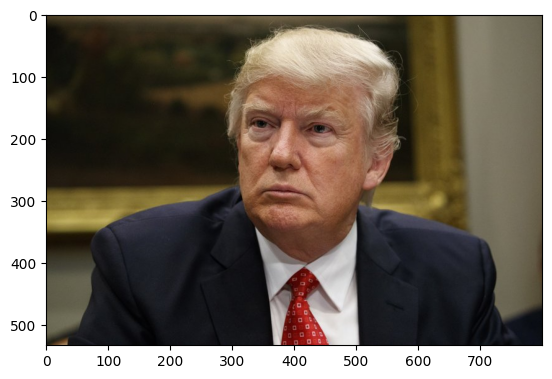

In [66]:
img = plt.imread('img.jpg')
plt.imshow(img)
plt.show()

In [77]:
# Your code:
grayscale_img = img[:, :,:3] @ [0.299, 0.587, 0.114]
assert grayscale_img.shape == (533, 800)

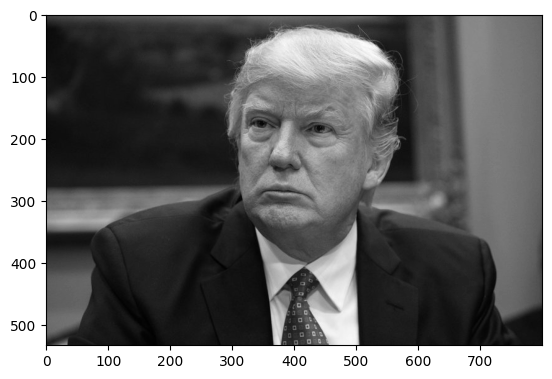

In [75]:
plt.imshow(grayscale_img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

### Задача №10

Вам требуется сделать ресайз изображения в два раза с помощью NumPy.

Хинт:
А что если брать каждый второй пиксель?

In [55]:
# Your code:
resised_image = img[::2, ::2]
assert resised_image.shape == (267, 400, 3)

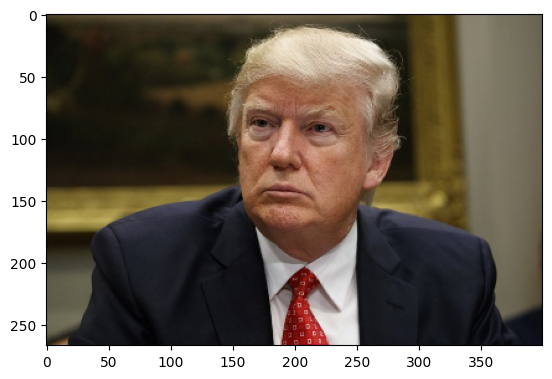

In [58]:
plt.imshow(resised_image)
plt.show()

### Задание №11 - Дифференциальная эволюция

Алгоритм дифференциальной эволюции (Differential Evolution, DE) — это эволюционный оптимизационный метод, который был разработан в 1997 году Рейном Сторном и Кеном Прайсом. DE является эффективным алгоритмом для глобальной оптимизации вещественных параметров функций, которые могут быть негладкими, мультимодальными и иметь множество локальных оптимумов. Этот метод часто используется для решения задач оптимизации, машинного обучения и настройки параметров моделей.

Вот основные шаги алгоритма дифференциальной эволюции:

1. Инициализация популяции: Начните с создания случайной популяции, где каждый индивид (вектор) представляет собой набор параметров, которые нужно оптимизировать. Эти параметры могут быть представлены вещественными числами.

2. Оператор мутации: Для каждого индивида в популяции создается мутантный индивид. Это делается путем комбинирования параметров из нескольких случайно выбранных индивидов с использованием оператора мутации. Обычно оператор мутации может выглядеть так:
$mutant = a + mutcoeff * (b - c)$

3. Оператор кроссовера (рекомбинации): Мутантный индивид объединяется с исходным индивидом с использованием оператора кроссовера (рекомбинации). Этот оператор помогает определить, какие параметры оставить от исходного индивида и какие параметры заменить мутантными значениями.

4. Оценка потомка: Оцените качество потомка, полученного после кроссовера, с помощью целевой функции.

5. Выбор индивида для следующего поколения: Сравните качество потомка и исходного индивида. Если потомок оказывается лучше, чем исходный индивид, то он становится частью следующего поколения. В противном случае, оставляем исходного индивида.

6. Повторение шагов 3-6: Повторяйте операции мутации, кроссовера, оценки и выбора индивидов для следующего поколения некоторое количество итераций или до достижения заданного критерия останова (например, максимальное число итераций или достижение заданной точности).

In [31]:
def differential_evolution(fobj, bounds, mutation_coefficient=0.8, crossover_coefficient=0.7, population_size=20, iterations=100):
    # Инициалиация популяции и получение первичных результатов
    dimensions = len(bounds)
    # Your code:
    population = np.random.rand(population_size, dimensions)
    min_bound, max_bound = bounds.T
    diff = np.fabs(min_bound - max_bound)
    population_denorm = min_bound + population * diff
    fitness = np.asarray([fobj(ind) for ind in population_denorm])
    # Найти лучший индекс
    best_idx = np.argmin(fitness)
    best = population_denorm[best_idx]
    for iteration in range(iterations):
        for population_index in range(population_size):
            idxs = [idx for idx in range(population_size) if idx != population_index]
            # Выбор трех случайных элементов
            # Your code:
            a, b, c = population[np.random.choice(idxs, 3, replace = False)]
            # Оператор мутации
            # Your code:
            mutant = np.clip(a + mutation_coefficient * (b - c), 0, 1) # use np.clip(value, 0, 1)
            # Оператор кроссовера
            # Your code:
            cross_points = np.random.rand(dimensions) < crossover_coefficient # hint: надо сделать булевый массив

            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            # Your code:
            # Рекомбинация (замена мутантными значениями)
            trial = np.where(cross_points, mutant, population[population_index]) # hint: надо использовать np.where
            trial_denorm = min_bound + trial * diff
            # Оценка потомка
            result_of_evolution = fobj(trial_denorm)
            # Выбор индивида для следующего клиента
            # Your code:
            if result_of_evolution < fitness[population_index]:
                fitness[population_index] = result_of_evolution
                population[population_index] = trial
                if result_of_evolution < fitness[best_idx]:
                    best_idx = population_index
                    best = trial_denorm
        yield best, fitness[best_idx]

In [32]:
def rastrigin(array, A=10):
    return A * 2 + (array[0] ** 2 - A * np.cos(2 * np.pi * array[0])) + (array[1] ** 2 - A * np.cos(2 * np.pi * array[1]))

In [43]:
bounds = np.array([[-20, 20], [-20, 20]])
result = np.array(list(differential_evolution(rastrigin, bounds)))

<ipython-input-43-802312bb7163>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(list(differential_evolution(rastrigin, bounds)))


In [44]:
assert result[-1, 1] < 10e-9

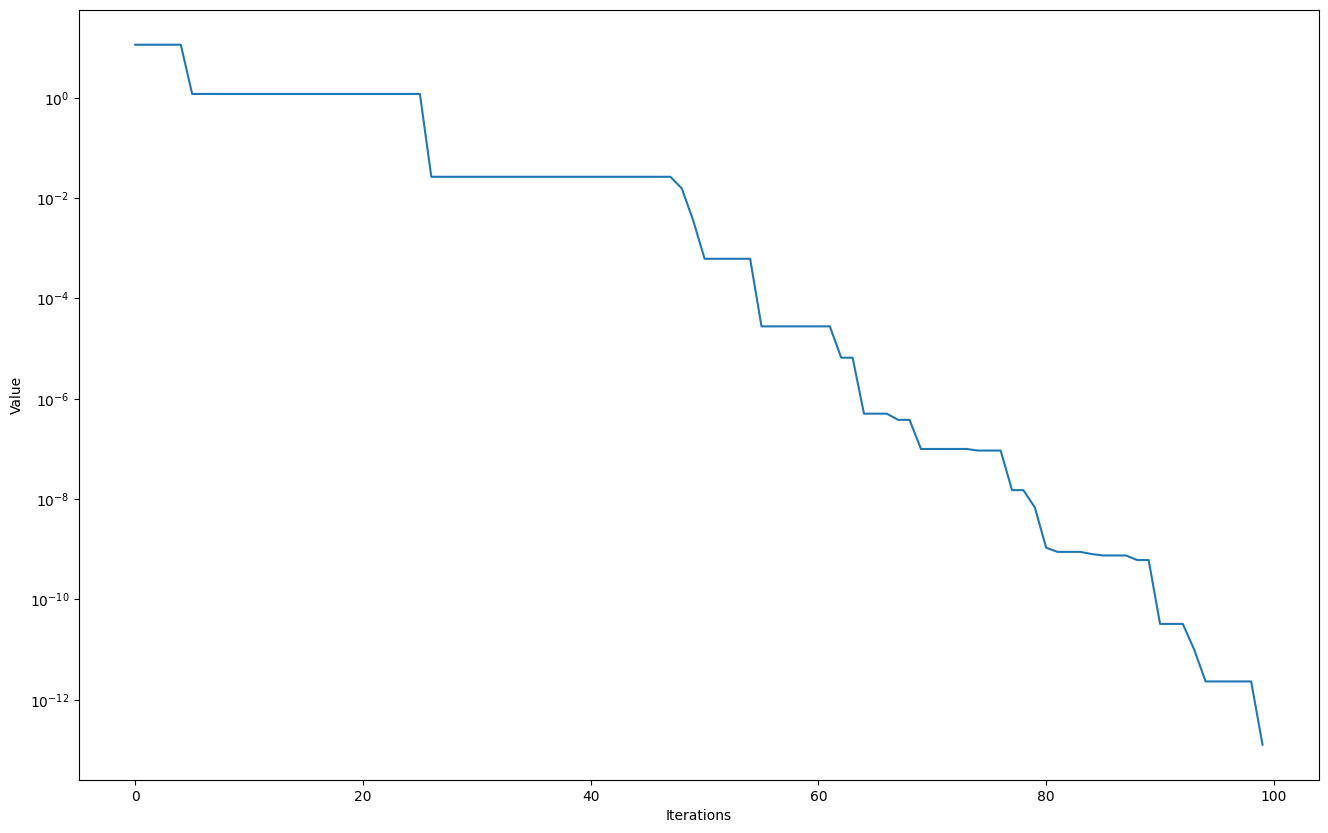

In [46]:
plt.figure(figsize=(16, 10))
plt.ylabel("Value")
plt.xlabel("Iterations")
plt.yscale("log")
plt.plot(result[:, 1])

## SciPy

Оптимизация:

    scipy.optimize.minimize: Поиск минимума функции с использованием различных методов оптимизации.
    scipy.optimize.curve_fit: Аппроксимация данных с использованием наименьших квадратов.
    scipy.optimize.linprog: Линейное программирование.

Интегрирование:

    scipy.integrate.quad: Вычисление определенных интегралов.
    scipy.integrate.odeint: Решение обыкновенных дифференциальных уравнений.

Линейная алгебра:

    scipy.linalg.solve: Решение линейных систем уравнений.
    scipy.linalg.eig: Вычисление собственных значений и собственных векторов.

Сигналы и обработка сигналов:

    scipy.signal.convolve: Свертка сигналов.
    scipy.signal.fftconvolve: Быстрая свертка сигналов с использованием быстрого преобразования Фурье.

Статистика:

    scipy.stats: Множество статистических функций и распределений.

Работа с изображениями:

    scipy.ndimage: Фильтрация, вращение, изменение размера и другие операции над изображениями.

Специальные функции:

    scipy.special: Множество математических специальных функций.

Работа с разреженными матрицами:

    scipy.sparse: Работа с разреженными матрицами и линейными операторами.

Интерполяция:

    scipy.interpolate: Интерполяция данных.

### Задача №12

Дан шумный график который описывает функцию синуса.

Требуется с помощью библиотеки SciPy апроксимировать данную функцию.

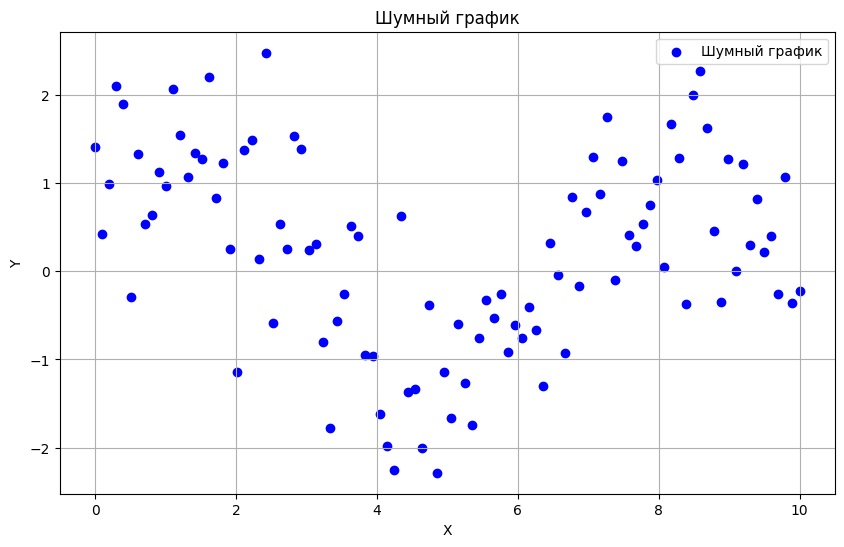

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Генерируем случайные данные
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.8, len(x))  # Добавляем шум

# Построим график данных
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Шумный график')
plt.title('Шумный график')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

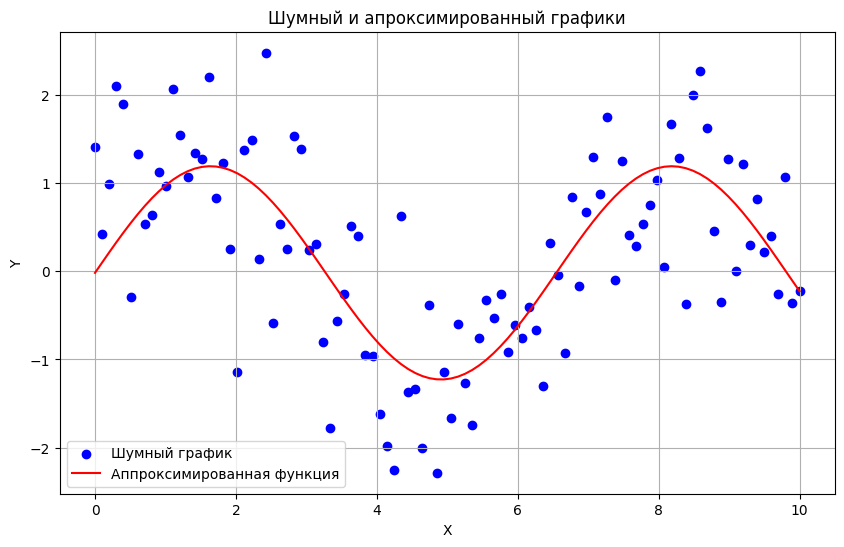

In [17]:
# Определяем функцию, которую будем подгонять к данным
def fit_function(x, a, b, c):
    return a * np.sin(b * x) + c

# Используем curve_fit для аппроксимации данных
# You code:
params, covariance = curve_fit(fit_function, x, y)

# Извлекаем параметры аппроксимации
a, b, c = params


# Построим график данных
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Шумный график')
plt.plot(x, fit_function(x, a, b, c), color='red', label='Аппроксимированная функция')
plt.title('Шумный и апроксимированный графики')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### Задание №13

**Оптимизация портфеля инвестиций**

Представьте, что вы инвестор/ка и у вас есть определенное количество средств, которые вы хотите инвестировать в акции различных компаний. Вам известна ожидаемая доходность каждой акции, а также риск (мера волатильности) для каждой акции. Ваша задача - определить оптимальное распределение средств между акциями так, чтобы максимизировать ожидаемую доходность при ограничении на максимальный риск портфеля.

У вас есть следующие данные:

    expected_returns: список ожидаемых доходностей для каждой акции.
    risk: список мер волатильности (риска) для каждой акции.
    total_investment: общая сумма средств, доступных для инвестирования.
    max_portfolio_risk: максимальный допустимый риск для портфеля.




In [37]:
import numpy as np
from scipy.optimize import minimize

# Данные для портфеля
expected_returns = np.array([0.12, 0.18, 0.15, 0.10])
risk = np.array([0.15, 0.22, 0.18, 0.12])

# Общая сумма средств и максимальный допустимый риск портфеля
total_investment = 1000000  # 1 миллион рублей
max_portfolio_risk = 0.20  # 20% максимального риска

# Определение функции для оптимизации
def portfolio_performance(weights, expected_returns, risk):
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(np.diag(risk), weights)))
    return portfolio_risk

# Начальное приближение (равномерное распределение средств)
initial_weights = np.ones(len(expected_returns)) / len(expected_returns)

# Ограничения
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},  # Сумма весов = 1
               {'type': 'ineq', 'fun': lambda weights: max_portfolio_risk - portfolio_performance(weights, expected_returns, risk)})  # Риск <= максимального риска

# Запуск оптимизации
# Your code:
result = minimize(portfolio_performance, initial_weights, args=(expected_returns, risk), method='SLSQP', constraints=constraints)

# Извлечение результатов
# Your code:
optimal_weights = result.x
optimal_risk = portfolio_performance(optimal_weights, expected_returns, risk)

# Вывод результатов
print("Оптимальное распределение средств:")
for i in range(len(optimal_weights)):
    print(f"Акция {i+1}: {optimal_weights[i]*total_investment:.2f} рублей")

print(f"Оптимальный риск портфеля: {optimal_risk*100:.2f}%")


Оптимальное распределение средств:
Акция 1: 266349.88 рублей
Акция 2: 180853.77 рублей
Акция 3: 221060.69 рублей
Акция 4: 331735.67 рублей
Оптимальный риск портфеля: 19.96%
